<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/03_Regresi%C3%B3n_Lineal/RL_con_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL con Pytorch

Si bien esta librería (al igual que Tensorflow) no tiene mucho sentido usarla para RL porque es una librería más típica de DeepLearning, puede tener sentido presentarla en este ejemplo sencillo como introducción.

In [1]:
from sklearn import datasets
import numpy as np

import torch

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=0.75, random_state=42)

In [3]:
X = np.float32(X)
y = np.float32(y).reshape(-1, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

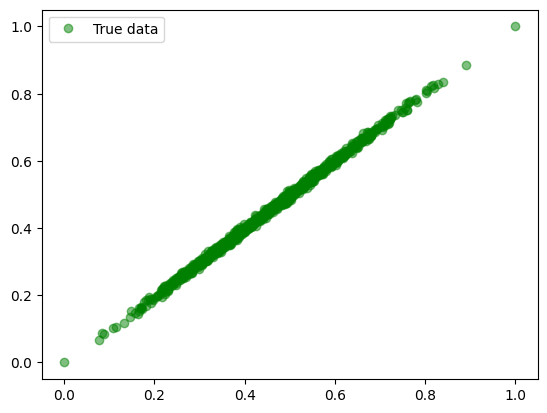

In [5]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(X, y, 'go', label='True data', alpha=0.5)
plt.legend(loc='best')
plt.show()

Pytorch trabaja directamente sobre tensores. Veamos un poco que es un tensor y como lo trabaja Pytorch

In [6]:
torch.__version__

'2.4.1+cu121'

In [7]:
# empty genera un tensor vacío (sin inicializar)
tensor=torch.empty(2,2)

In [8]:
tensor

tensor([[-5.9811e-35,  4.5333e-41],
        [-5.9811e-35,  4.5333e-41]])

In [9]:
# Rand genera un tensor aleatorio
tensor=torch.rand(2,2)

In [10]:
tensor

tensor([[0.4447, 0.9551],
        [0.0393, 0.9184]])

In [11]:
# Fíjense que si suman un número a un tensor, se suma elemento a elemento
tensor+1

tensor([[1.4447, 1.9551],
        [1.0393, 1.9184]])

In [12]:
# Se genera la multiplicación elemento a elemento (y no la multiplicación matricial)
tensor*tensor

tensor([[0.1978, 0.9122],
        [0.0015, 0.8434]])

In [13]:
# Mean devuelve la media de todos los elementos del tensor
tensor.mean()

tensor(0.5894)

In [14]:
# numel devuelve la cantidad total de elementos del tensor
tensor.numel()

4

In [15]:
# crea un tensor con la suma de los elementos del tensor
torch.sum(tensor)

tensor(2.3574)

In [16]:
import torch.nn as nn

# L1 o MAE Error Medio Absoluto
#l = nn.L1Loss()

# MAE loss
#def l(t1, t2):
#    diff = t1 - t2
#    return (torch.sum(diff) / diff.numel())


#MSE o Error Cuadrático Medio
l = nn.MSELoss()

# MSE loss
#def l(t1, t2):
#    diff = t1 - t2
#    return torch.sum(diff * diff) / diff.numel()

In [17]:
def model(x):
    return x @ w.t() + b

In [18]:
# Weights and biases
#w = torch.randn(1, 1, requires_grad=True)
#b = torch.randn(1, requires_grad=True)
w=torch.tensor([[2.]], requires_grad=True)
b=torch.tensor([[0.]], requires_grad=True)

In [19]:
w

tensor([[2.]], requires_grad=True)

In [20]:
b

tensor([[0.]], requires_grad=True)

In [21]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(y)

In [22]:
# Generate predictions
preds = model(inputs)

In [23]:
# Compute loss
loss = l(preds, targets)
print(loss)

tensor(0.2318, grad_fn=<MseLossBackward0>)


In [24]:
# Calculo la derivada de la función de coste
loss.backward()

In [25]:
# Estos son los parámetros estimados y su gradiente
print(w)
print(w.grad)

tensor([[2.]], requires_grad=True)
tensor([[0.4620]])


In [26]:
with torch.no_grad():
    # Ajusto los parámetros
    w -= w.grad * 1e-2
    b -= b.grad * 1e-2
    # Y reinicializo los gradientes
    w.grad.zero_()
    b.grad.zero_()

In [27]:
print(w)
print(b)

tensor([[1.9954]], requires_grad=True)
tensor([[-0.0092]], requires_grad=True)


In [28]:
# Compute loss
loss = l(preds, targets)
print(loss)

tensor(0.2318, grad_fn=<MseLossBackward0>)


In [29]:
# Esto lo tengo que hacer en un proceso iterativo. A cada "vuelta" de este proceso se la conoce como epoch
epochs=750
step=0.1
losses=[]
for i in range(epochs):
    preds = model(inputs)
    loss = l(preds, targets)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
      w -= w.grad * step
      b -= b.grad * step
      w.grad.zero_()
      b.grad.zero_()

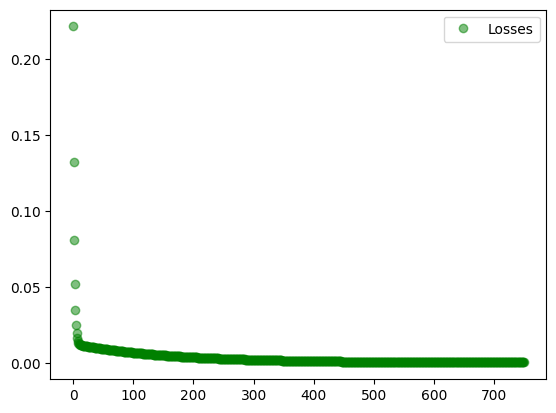

In [30]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(losses, 'go', label='Losses', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [31]:
print(w)
print(b)

tensor([[1.0898]], requires_grad=True)
tensor([[-0.0439]], requires_grad=True)


In [32]:
# Compute loss
loss = l(preds, targets)
print(loss.item())

0.00015286779671441764


In [33]:
preds = model(inputs)

In [34]:
w

tensor([[1.0898]], requires_grad=True)

In [35]:
b

tensor([[-0.0439]], requires_grad=True)

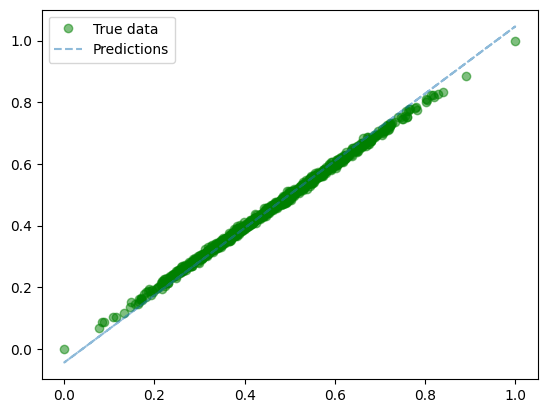

In [36]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(X, y, 'go', label='True data', alpha=0.5)
plt.plot(X, preds.detach().numpy(), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# Sklearn

In [37]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [38]:
lr.coef_

array([[1.0131872]], dtype=float32)

In [39]:
lr.intercept_

array([-0.00814143], dtype=float32)

In [40]:
yest=lr.predict(X)

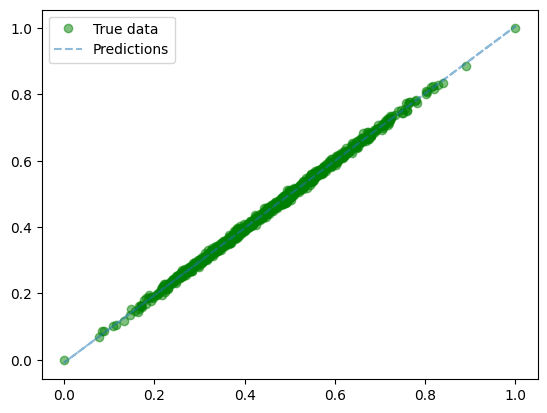

In [41]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(X, y, 'go', label='True data', alpha=0.5)
plt.plot(X, yest, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yest)

4.0135907e-05

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,yest)

0.005054437

# Batches

In [44]:
# Weights and biases
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
#w=torch.tensor([[1.]], requires_grad=True)
#b=torch.tensor([[0.]], requires_grad=True)

In [45]:
from torch.utils import data
def load_array(data_arrays, batch_size):
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=True)

In [46]:
batch_size=10
data_iter = load_array((inputs, targets), batch_size)

In [47]:
epochs=1000
step=0.001
losses=[]
for i in range(epochs):
  for X_b, y_b in data_iter:
    preds = model(X_b)
    loss = l(preds, y_b)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
      w -= w.grad * step
      b -= b.grad * step
      w.grad.zero_()
      b.grad.zero_()

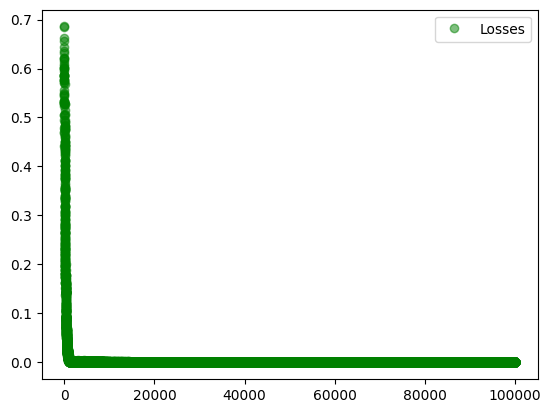

In [48]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(losses, 'go', label='Losses', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [49]:
preds = model(inputs)

In [50]:
w

tensor([[1.0005]], requires_grad=True)

In [51]:
b

tensor([-0.0022], requires_grad=True)

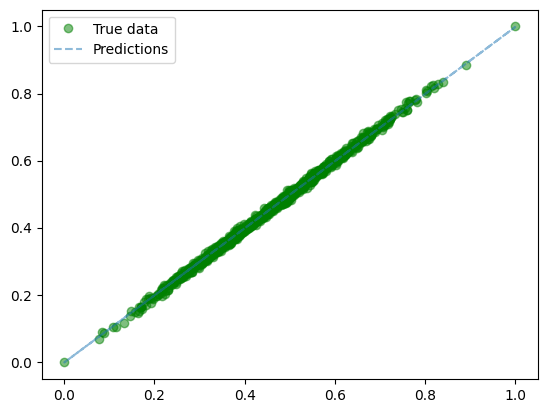

In [52]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(X, y, 'go', label='True data', alpha=0.5)
plt.plot(X, preds.detach().numpy(), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()